In [1]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)

    def _convert_state(self, obs):
        y, x = np.where(obs == self.agent_indicator)
        return (int(y[0]), int(x[0]))  # ← 정확한 좌표 기반 상태 반환

    def update(self, state, action, reward, next_state):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        q_value = self.q_values[state][action]
        max_next_q = max(self.q_values[next_state])
        td_error = reward + self.gamma * max_next_q - q_value
        self.q_values[state][action] = q_value + self.alpha * td_error

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            return np.argmax(q_values)


In [3]:
from utils import gen_wrapped_env, show_video

In [4]:
from utils import gen_wrapped_env
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')  # 6x6 환경

agent = QLearning(actions=3, agent_indicator=10)

episodes = 5000  # 충분히 학습
for ep in range(episodes):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    ep_rewards = 0

    while not done:
        next_obs, reward, done, info = env.step(action)
        next_action = agent.act(next_obs)
        agent.update(obs, action, reward, next_obs)
        obs = next_obs
        action = next_action
        ep_rewards += reward

    if (ep+1) % 500 == 0:
        print(f"Episode {ep+1}: Reward = {ep_rewards}")

env.close()


episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
episode: 420, rewards: 0
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0
episode: 500, rewards: 0
episode: 520, rewards: 0
episode: 540, rewards: 0
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0
episode: 620, rewards: 0
episode: 640, rewards: 0
episode: 660, rewards: 0
episode: 680, rewards: 0
episode: 700, rewards: 0
episode: 720, rewards: 0
episode: 740, rewards: 0
episode: 760, rewards: 0
episode: 780, rewards: 0
episode: 800, rewards: 0
epis

In [5]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.03923, 0.03912, 0.04468],
 12: [0.06712, 0.06722, 0.07227],
 3: [0.03507, 0.03526, 0.0382],
 6: [0.0411, 0.04096, 0.04219],
 9: [0.04265, 0.0426, 0.04396],
 24: [0.08689, 0.08665, 0.0934],
 36: [0.09753, 0.09715, 0.11265],
 15: [0.09981, 0.09948, 0.10948],
 18: [0.12877, 0.12876, 0.14868],
 21: [0.16461, 0.16515, 0.19812],
 27: [0.2049, 0.20495, 0.23125],
 33: [0.32429, 0.32521, 0.36869],
 30: [0.26588, 0.26813, 0.30527],
 42: [0.48756, 0.48861, 0.49943],
 39: [0.37233, 0.37221, 0.38664],
 45: [0.0, 0.0, 0.0]}

In [28]:
show_video()

In [8]:
import os
os.makedirs("./logs", exist_ok=True)

pd.Series(rewards).to_csv('./logs/rewards_qlearning_empty.csv')


In [9]:
#sarsa_logs = pd.read_csv('./logs/rewards_sarsa.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_qlearning_empty.csv', index_col=False).iloc[:, 1]

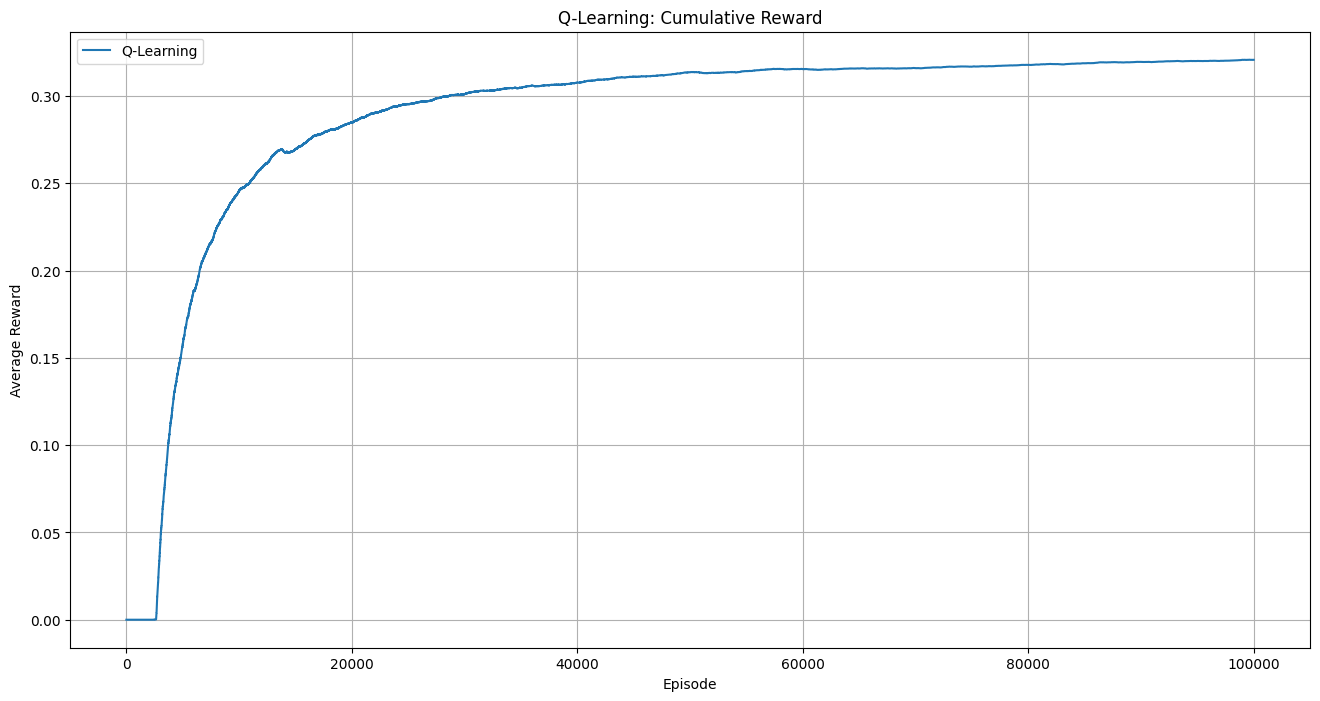

In [10]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0])) + 1), label="Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Q-Learning: Cumulative Reward")
plt.legend()
plt.grid(True)
plt.savefig("qlearning_empty.jpg", dpi=300, bbox_inches='tight')
plt.show()
